# Object detection with Keras and TS

In [57]:
# Documentation : https://www.tensorflow.org/hub/tutorials/object_detection?hl=fr

## Setup

In [58]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [59]:
batch_size = 32
img_height = 150
img_width = 150
size = (img_height, img_width)

tfds.disable_progress_bar()


folderName = 'datasets/'

# Données d'entrainement (X)
train_ds = keras.utils.image_dataset_from_directory(
  folderName,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Données de validation (Y)
validation_ds = keras.utils.image_dataset_from_directory(
  folderName,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# train_ds, validation_ds, test_ds = tfds.load(
#     "cats_vs_dogs",
#     # Reserve 10% for validation and 10% for test
#     split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
#     as_supervised=True,  # Include labels
# )

print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print(
    "Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds)
)
# print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))

Found 6958 files belonging to 8 classes.
Using 5567 files for training.
Found 6958 files belonging to 8 classes.
Using 1391 files for validation.
Number of training samples: 174
Number of validation samples: 44


## Affichage des images

2024-03-27 12:05:48.535714: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


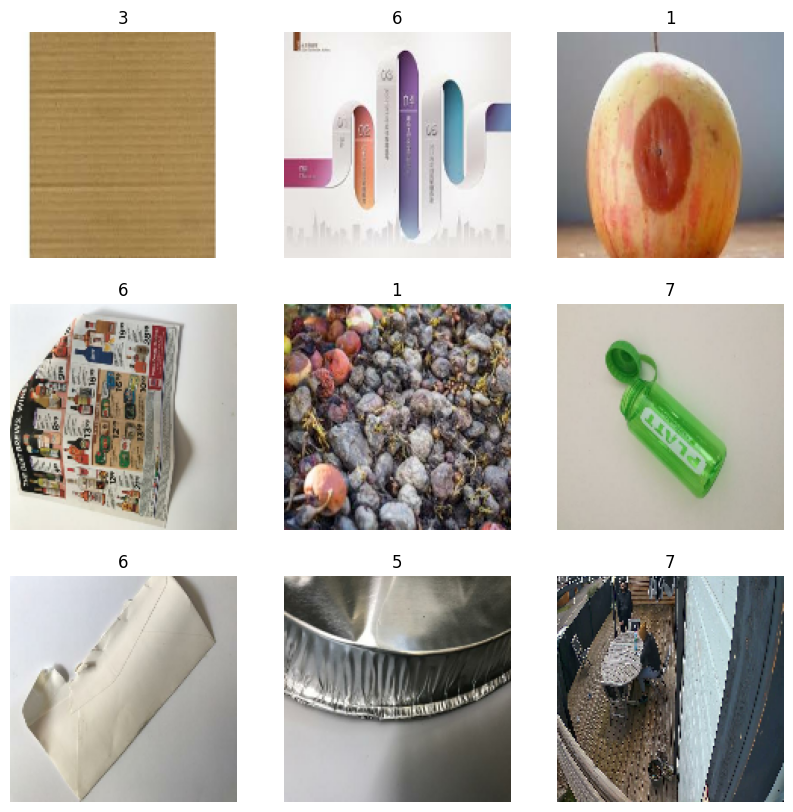

In [60]:
# Affichage des images d'entraînement
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Prend un seul batch
    for i in range(9):  # Affiche les 9 premières images de ce batch
        ax = plt.subplot(3, 3, i + 1)
        # Affiche une seule image à la fois
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

## Redimensionnons les images à 150x150 et Optimisations

In [61]:
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))


batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)

## Augmentation de données

In [62]:
# Augmentation virtuelle des données d'entrainement
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [63]:
# Visualisation des données "augmentées"
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        # Obtenir une seule image du batch
        image = images[i]
        # Ajouter une dimension de batch pour que l'image soit de forme (1, hauteur, largeur, canaux)
        image = tf.expand_dims(image, 0)
        # Appliquer la data augmentation
        augmented_image = data_augmentation(image)
        # Visualiser l'image augmentée
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

2024-03-27 12:05:49.986466: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 2764840960 bytes after encountering the first element of size 276484096 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size
2024-03-27 12:05:49.994607: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input [[[[[124.       125.       119.      ]
    [124.       125.       119.      ]
    [124.       125.       119.      ]
    ...
    [146.       147.       141.      ]
    [146.       147.       141.      ]
    [143.9375   144.9375   138.9375  ]]

   [[124.       125.       119.      ]
    [124.       125.       119.      ]
    [124.       125.       119.      ]
    ...
    [146.       147.       141.      ]
    [146.       147.       141.      ]
    [146.75     147.75     141.75    ]]

   [[124.       125.       119.      ]
    [124.       125.       119.      ]
    [124.       125.       119.      ]
    ...
    [146.       147.       141.      ]
    [146.       147.       141.      ]
    [143.       144.       138.      ]]

   ...

   [[155.6875   156.6875   150.6875  ]
    [158.5      159.5      153.5     ]
    [155.75     156.75     150.75    ]
    ...
    [175.75     176.75     170.75    ]
    [179.875    180.875    174.875   ]
    [173.5      174.5      168.5     ]]

   [[155.25     156.25     150.25    ]
    [158.0625   159.0625   153.0625  ]
    [154.9375   155.9375   149.9375  ]
    ...
    [178.875    179.875    173.875   ]
    [172.5625   173.5625   167.5625  ]
    [177.0625   178.0625   172.0625  ]]

   [[159.1875   160.1875   154.1875  ]
    [155.25     156.25     150.25    ]
    [162.25     163.25     157.25    ]
    ...
    [172.3125   173.3125   167.3125  ]
    [179.875    180.875    174.875   ]
    [175.375    176.375    170.375   ]]]


  [[[230.       225.       170.      ]
    [230.       225.       170.      ]
    [230.       225.       170.      ]
    ...
    [234.       228.       170.      ]
    [234.       228.       170.      ]
    [234.       228.       170.      ]]

   [[230.       225.       170.      ]
    [230.       225.       170.      ]
    [230.       225.       170.      ]
    ...
    [234.       228.       170.      ]
    [234.       228.       170.      ]
    [234.       228.       170.      ]]

   [[230.       225.       170.      ]
    [230.       225.       170.      ]
    [230.       225.       170.      ]
    ...
    [234.       228.       170.      ]
    [234.       228.       170.      ]
    [234.       228.       170.      ]]

   ...

   [[ 50.279987  50.279987  50.279987]
    [ 50.856     50.856     50.856   ]
    [ 52.165012  52.165012  52.165012]
    ...
    [ 49.618313  49.618313  49.618313]
    [ 43.091003  43.091003  43.091003]
    [ 50.733643  50.733643  50.733643]]

   [[ 46.764664  46.764664  46.764664]
    [ 50.346     50.346     50.346   ]
    [ 54.27433   54.27433   54.27433 ]
    ...
    [ 49.082993  49.082993  49.082993]
    [ 45.320007  45.320007  45.320007]
    [ 51.365383  51.365383  51.365383]]

   [[ 50.97094   50.97094   50.97094 ]
    [ 49.36      49.36      49.36    ]
    [ 52.97333   52.97333   52.97333 ]
    ...
    [ 48.431667  48.431667  48.431667]
    [ 52.57279   52.57279   52.57279 ]
    [ 53.36789   53.36789   53.36789 ]]]


  [[[104.17333  154.58667  228.      ]
    [ 97.327194 145.8436   221.8436  ]
    [ 71.19199  110.03999  177.32466 ]
    ...
    [218.9133   198.9133   187.9133  ]
    [223.27638  203.27638  192.27638 ]
    [218.41214  198.41214  187.41214 ]]

   [[103.72307  155.17334  228.58253 ]
    [ 92.9092   139.66919  214.7908  ]
    [ 64.08666  100.30666  167.46    ]
    ...
    [216.80197  196.80197  185.80197 ]
    [223.79079  203.79079  192.79079 ]
    [224.65694  204.65694  193.65694 ]]

   [[100.58     152.16666  226.59467 ]
    [ 85.316    131.022    203.656   ]
    [ 56.03      90.       153.86333 ]
    ...
    [221.06998  201.06998  190.06998 ]
    [226.10199  206.10199  195.10199 ]
    [225.90666  205.90666  194.90666 ]]

   ...

   [[ 36.        47.        75.      ]
    [ 36.62      47.62      75.62    ]
    [ 37.966667  48.966667  76.96667 ]
    ...
    [163.06671  145.06671  133.06671 ]
    [164.34     146.34     134.34    ]
    [162.32799  144.32799  132.32799 ]]

   [[ 36.        47.        75.      ]
    [ 36.62      47.62      75.62    ]
    [ 37.966667  48.966667  76.96667 ]
    ...
    [162.66599  144.66599  132.66599 ]
    [163.91998  145.91998  133.91998 ]
    [156.88666  138.88666  126.88666 ]]

   [[ 36.        47.        75.      ]
    [ 36.62      47.62      75.62    ]
    [ 37.966667  48.966667  76.96667 ]
    ...
    [155.906    137.906    125.906   ]
    [154.79999  136.79999  124.79999 ]
    [153.49574  135.49574  123.495735]]]


  ...


  [[[255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    ...
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]]

   [[255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    ...
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]]

   [[255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    ...
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]]

   ...

   [[255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    ...
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]]

   [[255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    ...
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]]

   [[255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    ...
    [255.       255.       255.      ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]]]


  [[[250.02667  249.46527  247.46527 ]
    [251.89749  254.4475   252.4475  ]
    [244.34029  253.43333  248.75694 ]
    ...
    [252.91672  252.91672  252.91672 ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]]

   [[251.65666  252.025    249.84084 ]
    [248.47     252.8725   249.67    ]
    [245.225    253.64584  250.29166 ]
    ...
    [253.5125   253.5125   253.5125  ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]]

   [[250.2736   251.03055  248.6639  ]
    [247.88333  253.32083  249.59999 ]
    [218.75694  231.59027  225.09029 ]
    ...
    [253.0903   253.0903   253.0903  ]
    [255.       255.       255.      ]
    [255.       255.       255.      ]]

   ...

   [[250.03197  253.44168  248.4653  ]
    [253.88751  252.26248  253.36667 ]
    [156.903    143.23633  114.98633 ]
    ...
    [213.68741  196.35416  148.47235 ]
    [254.69998  252.37086  246.35841 ]
    [249.3569   254.71667  249.14714 ]]

   [[246.4401   251.16006  243.15677 ]
    [253.845    252.595    253.24501 ]
    [168.17902  154.51236  125.09569 ]
    ...
    [218.1582   198.61658  154.37923 ]
    [254.9025   251.24751  248.79504 ]
    [251.23247  254.33418  251.91829 ]]

   [[239.56305  246.14638  236.27972 ]
    [253.0625   249.1492   248.46754 ]
    [179.85277  166.1861   135.52916 ]
    ...
    [220.62643  199.75983  159.76967 ]
    [255.       250.36668  249.90005 ]
    [251.97801  253.92809  253.97275 ]]]


  [[[215.22     219.22     230.22    ]
    [215.22     219.22     230.22    ]
    [214.974    218.974    229.974   ]
    ...
    [163.22     167.22     178.22    ]
    [162.       166.       177.      ]
    [161.       165.       176.      ]]

   [[214.66     218.66     229.66    ]
    [214.66     218.66     229.66    ]
    [213.66     217.66     228.66    ]
    ...
    [162.66     166.66     177.66    ]
    [162.       166.       177.      ]
    [161.       165.       176.      ]]

   [[214.       218.       229.      ]
    [214.       218.       229.      ]
    [212.1      216.1      227.1     ]
    ...
    [162.       166.       177.      ]
    [162.       166.       177.      ]
    [161.       165.       176.      ]]

   ...

   [[205.1      209.1      220.1     ]
    [204.03801  208.03801  219.03801 ]
    [203.97     207.97     218.97    ]
    ...
    [155.       159.       168.      ]
    [154.       158.       167.      ]
    [153.       157.       166.      ]]

   [[206.5236   210.5236   221.5236  ]
    [205.25081  209.25081  220.25081 ]
    [204.638    208.638    219.638   ]
    ...
    [155.       159.       168.      ]
    [154.       158.       167.      ]
    [153.       157.       166.      ]]

   [[207.       211.       222.      ]
    [206.       210.       221.      ]
    [205.21266  209.21266  220.21266 ]
    ...
    [155.       159.       168.      ]
    [154.       158.       167.      ]
    [153.       157.       166.      ]]]]]. Expected shape (None, 150, 150, 3), but input has incompatible shape (1, 32, 150, 150, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 32, 150, 150, 3), dtype=float32)
  • training=None
  • mask=None

<Figure size 1000x1000 with 0 Axes>

## Construction du modèle

In [64]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_17 (Sequential)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)